# Exercise 3 answer
## André Filipe Silva - 26005

### Exercise 3a)

In [2]:
library(quantmod)
getSymbols("AMZN", src="yahoo", from="2007-12-01", to="2020-03-13")
daily_close_years=ts(as.vector(AMZN$AMZN.Close), deltat=1/365, start=2007)

Warning message:
"'indexClass<-' is deprecated.
Use 'tclass<-' instead.
See help("Deprecated") and help("xts-deprecated")."

[1] "AMZN"

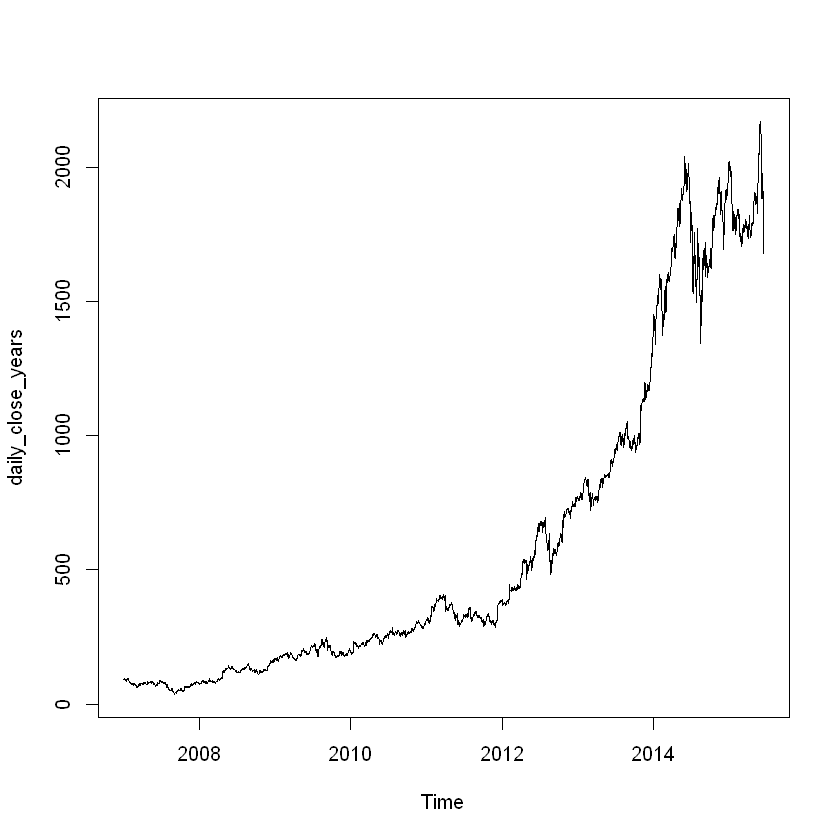

In [3]:
plot(daily_close_years)

Upon inspection of this plot, the series does not look stationary. However, I will decompose it according to the Loess decomposition to get the irregular part.

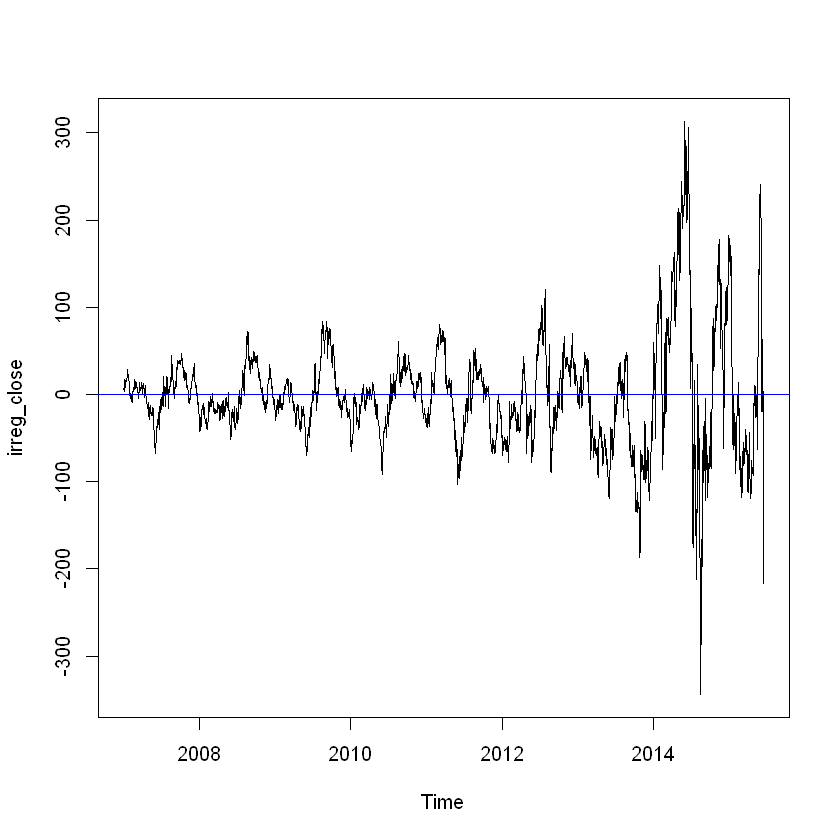

In [5]:
stl_close = stl(daily_close_years, "periodic")
irreg_close= stl_close$time.series[,3]
plot(irreg_close)
abline(h=0, col="blue")

Although the variance increases substantially from 2014 onwards, the series does look stationary according to this plot. But in this one I have decomposed the different aspects of the series, which is not what the question asks. This was merely an intellectual exercise.

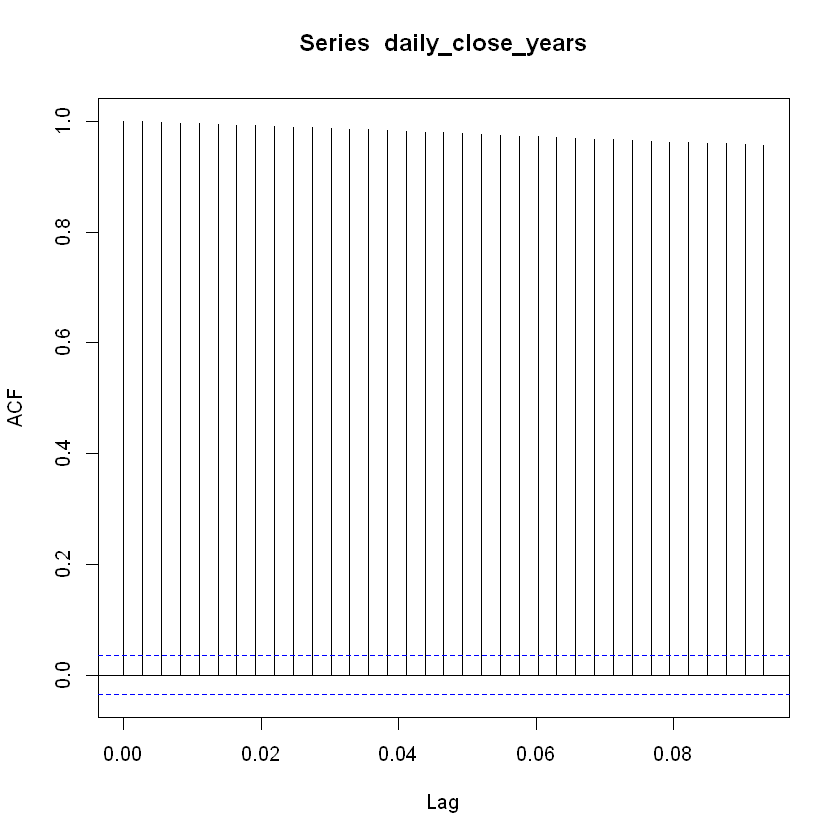

In [7]:
acf(daily_close_years)

From the ACF, we seem to be looking at a highly persistent AR process, very near the unit root. Although it seems to be slowly decaying over time, it has a very small decay, and I can't even say for sure it is converging towards zero. So, I would still stay it does not look stationary.

### Exercise 3b)

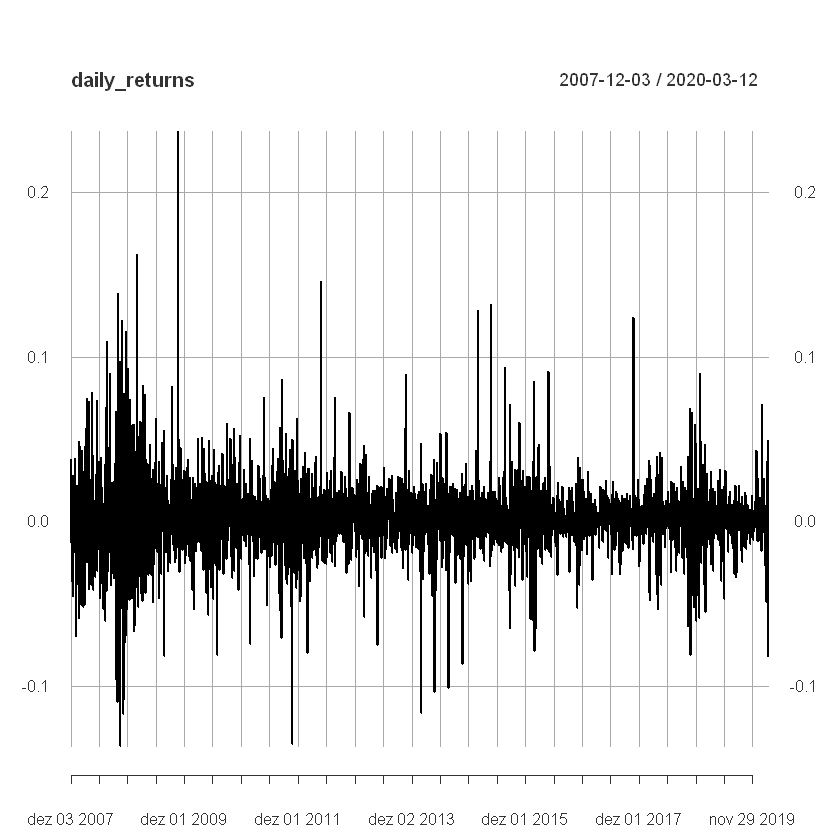

In [10]:
daily_returns=diff(log(AMZN$AMZN.Close))
plot(daily_returns)

The daily returns do look stationary, around a mean of 0.

As we took first differences, the first observation disappeared. We need to delete the missing value.

In [11]:
daily_returns=daily_returns[2:3090]

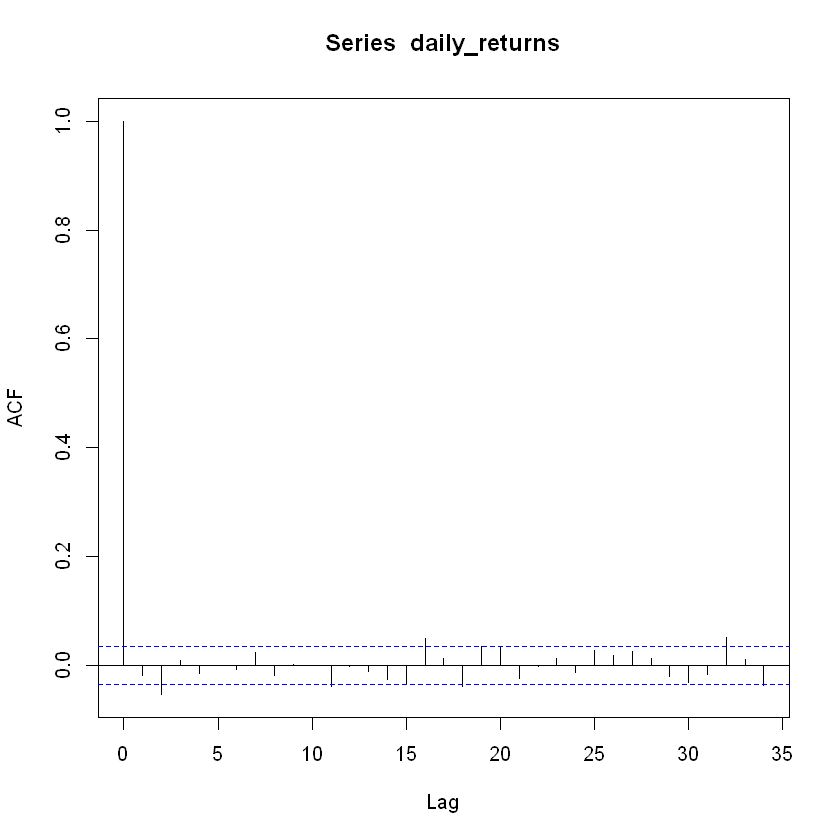

In [12]:
acf(daily_returns)

The ACF is not very conclusive as we have significant lags on 3, 16, perhaps 32...
 I wouldn't change my conclusion based on this, however. The lags that are significant, are only marginally so.


In [14]:
library(tseries)

We will now perform de Augmented Dickey-Fuller test for stationarity.

$H_0$: Unit Root (Non - stationarity)

$H_1$: Stationarity

In [15]:
adf.test(AMZN$AMZN.Close)


	Augmented Dickey-Fuller Test

data:  AMZN$AMZN.Close
Dickey-Fuller = -1.7044, Lag order = 14, p-value = 0.7035
alternative hypothesis: stationary


We do not reject the null hypothesis, so the close prices are not stationary in levels.

In [16]:
adf.test(daily_returns)

Warning message in adf.test(daily_returns):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  daily_returns
Dickey-Fuller = -16.017, Lag order = 14, p-value = 0.01
alternative hypothesis: stationary


We reject the null hpyothesis, so from this test we conclude that the daily returns as we computed them are stationary.

### Exercise 3c)

The series have already been first differenced, so to fit we will use c(2,0,1) - or it would difference again.

In [17]:
arma21=arima(daily_returns, order=c(2,0,1), include.mean=TRUE)
arma21$coef

ar1           ar2           ma1     intercept 
-0.1917667553 -0.0578583013  0.1714897114  0.0009568662

To calculate the unconditional mean of the Amazon daily stock return, we follow the usual procedure of taking expectactions from the model. The model is:

$y_t = 0.00095686620632675 -0.191766755343116y_{t-1} -0.0578583013325819y_{t-2} + \epsilon_t + 0.171489711400787\epsilon_{t-1}$

Taking expectations, we get the following results:

In [18]:
mean_arma21= 0.00095686620632675/(1+0.191766755343116+0.0578583013325819)
mean_arma21*100

[1] 0.07657226

So, the unconditional mean of the Amazon daily stock return in percentage is 0.077%.

### Exercise 3d)

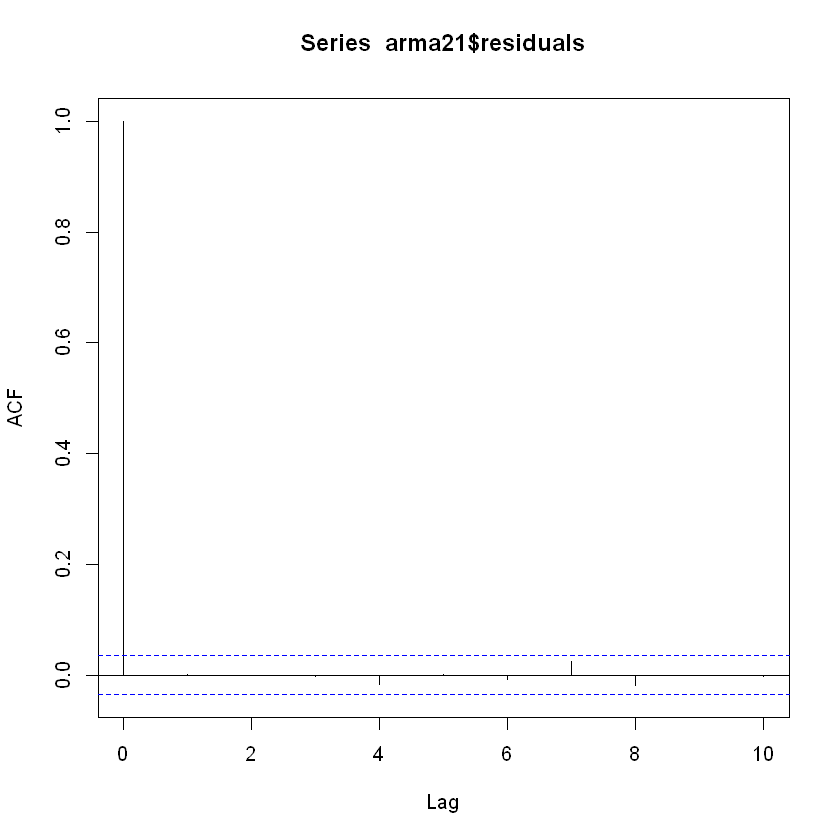

In [20]:
acf(arma21$residuals, lag=10)

From here, I would conclude for stationarity because there seems to be no autocorrelation in the residuals. But let's check with the Ljung-Box test.

In [21]:
Box.test(arma21$residuals, lag=10, type="Ljung")


	Box-Ljung test

data:  arma21$residuals
X-squared = 3.9386, df = 10, p-value = 0.9501


$H_0$: No autocorrelation in the residuals (Stationarity)

$H_1$: Autocorrelation in the residuals (Non-Stationarity)

Given the p-value, we do not reject the null hypothesis, and we conclue the series to be stationary.

### Exercise 3e)

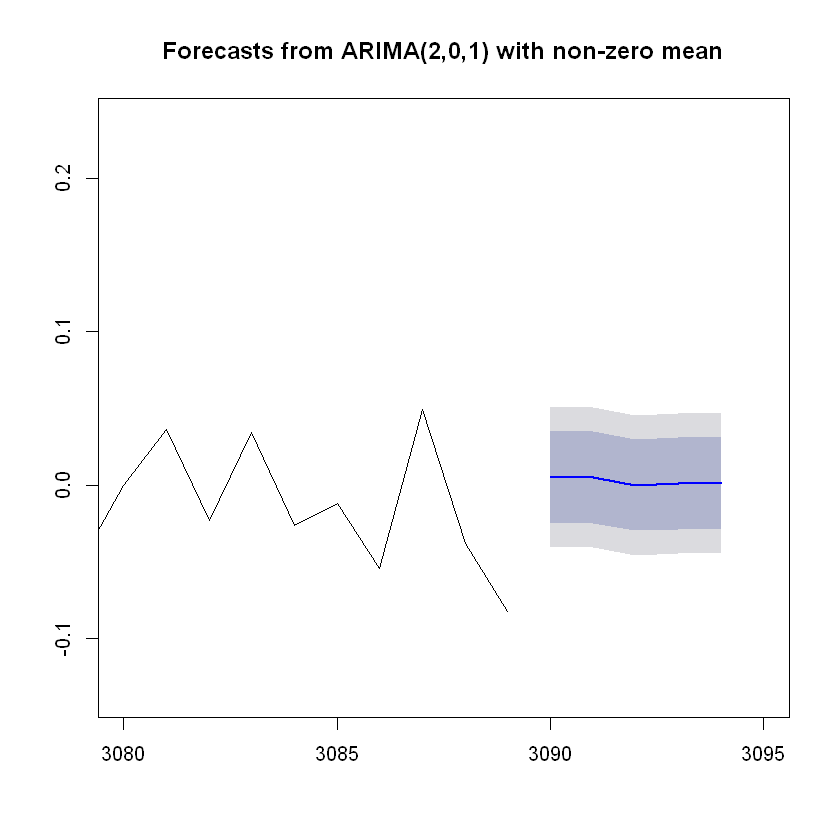

In [24]:
tsdailyreturns=as.ts(daily_returns)

new_arma= arima(tsdailyreturns, c(2,0,1), include.mean=TRUE)
library(forecast)
forecast1=forecast(new_arma, h=5)
plot(forecast1, xlim=c(3080,3095))

In [25]:
mean((forecast1$mean)*100)

[1] 0.243049

The mean of the daily stock returns for the next 5 days is positive. Hence, I would recommend buying Amazon stock.

### Exercise 3f)

The one-step ahead forecast is directly impacted by the MA component, but from two steps-ahead onwards only the AR component affects our forecasts. As the AR components are small in absolute value the forecast quickly converges to the unconditional mean (as can be seen in the plot).